In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# K Means Clustering

It is an unsupervised learning algorithm (__Flat Clustering__), where K is the number of centroids (clusters). Thus, the number of clusters is pre-defined.

1st step: Start with K centroids by putting them at a random place

2nd step: Compute the distance of every point to the centroid and cluster them accordingly

3rd step: Place the centroids at the center of gravity of the given cluster

Repeat the 2nd and 3rd step until there is no change in the clusters.

How to define the number of clusters? Elbow technique, plot the sum of squared errors (SSE) as a function of K and find the elbow in the graph, this is the ideal value of K.  

K Means Clustering will have a hard time handling differently sized data, scaling should be performed.

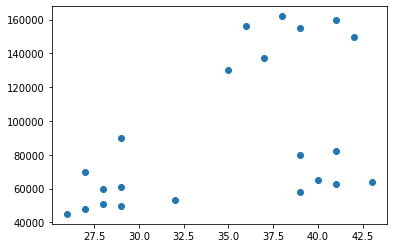

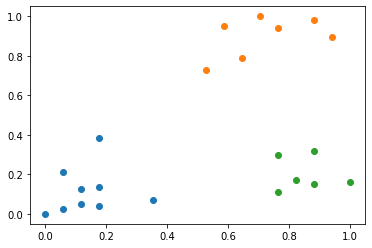

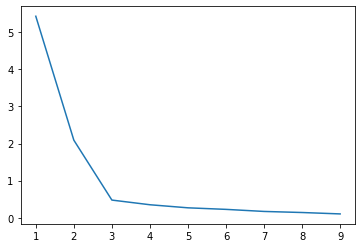

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('income.csv')
df

plt.scatter(df['Age'],df['Income($)'])

#Scaling the data is important in this case
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

cluster = KMeans(n_clusters = 3)
cluster

y_predicted = cluster.fit_predict(df[['Age','Income($)']])
y_predicted

df['cluster'] = y_predicted
df

plt.figure()

for n in range(0,3):
    a = df[df.cluster==n]
    plt.scatter(a['Age'],a['Income($)'])

SSE = []
for k in range(1,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit_predict(df[['Age','Income($)']])
    SSE.append(cluster.inertia_)
    
plt.figure()
plt.plot(range(1,10),SSE)

<Figure size 432x288 with 0 Axes>

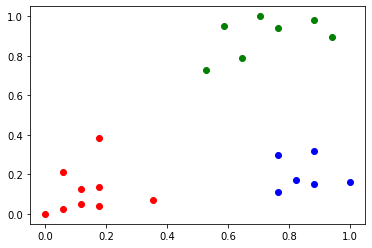

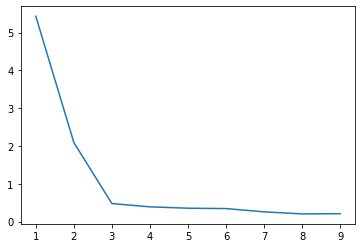

In [9]:
# K Means from Scratch

def min_max_scaler(df):
    for column in df.keys():
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            max_val = df[column].max()
            min_val = df[column].min()
            df[column] = df[column].apply(lambda x: (x-min_val)/ (max_val-min_val))
    

class K_Means_Clustering:    
    def __init__(self, n_clusters = 3,tol=0.001, max_iter = 300):
        self.k = n_clusters
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, X):
        self.cluster = {}
        self.centroids = {}
        self.SSE = 0
        diff = [[]]*self.k
        max_diff = 10
        n_iter = 0

        for i in range(self.k):                  # Initializing centroids
            self.centroids[i] = X[i] 

        while n_iter < self.max_iter and max_diff > self.tol:
            old_centroids = dict(self.centroids)
            for i in range(self.k):                          # Initializing cluster dict
                self.cluster[i] = []

            for feature_set in X:    
                d = [(np.linalg.norm(self.centroids[i]-feature_set)) for i in range(self.k)]
                cl_index = d.index(min(d))
                self.cluster[cl_index].append(feature_set)

            for i in self.cluster:
                if (self.cluster[i] != []): 
                    self.centroids[i] = sum(self.cluster[i])/len(self.cluster[i])
                diff[i] = max(abs(self.centroids[i] - old_centroids[i])/ old_centroids[i]) # Getting differences
                                                                                      # between old and new centroids  
                                                                                      # and getting max difference  
                                                                                      # from the coordinates   
            max_diff = max(diff)                                                      
            n_iter += 1
        
        for cl in self.cluster:
                SE = [sum((feature_set - self.centroids[cl])**2) for feature_set in self.cluster[cl]]
                self.SSE = self.SSE + sum(SE)
            
    def visualize(self):
        color = ['r','g','b','o.','p']
        plt.figure()
        for cl in self.cluster:
            for feature_set in self.cluster[cl]:
                plt.scatter(feature_set[0],feature_set[1], c=color[cl])

    



df = pd.read_csv('income.csv')
min_max_scaler(df)
X = np.array(df.drop(['Name'],1))


KMeans = K_Means_Clustering(n_clusters=3)
KMeans.fit(X)
KMeans.visualize()

SSE = []
for k in range(1,10):
    clf = K_Means_Clustering(n_clusters=k)
    clf.fit(X)
    SSE.append(clf.SSE)
    
plt.figure()
plt.plot(range(1,10),SSE)


#def min_max_scaler(df):
    